/tmp/ipykernel_12866/920420033.py:41: RuntimeWarning: overflow encountered in scalar multiply
  0.5 * sigma**2 * S_grid[i]**2 * gamma -
/tmp/ipykernel_12866/920420033.py:39: RuntimeWarning: invalid value encountered in scalar add
  C_new[i] = C[i] + dt * (
/tmp/ipykernel_12866/920420033.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  delta = (C[i+1] - C[i-1]) / (2*dS)
/tmp/ipykernel_12866/920420033.py:40: RuntimeWarning: invalid value encountered in scalar add
  r * S_grid[i] * delta +
/tmp/ipykernel_12866/920420033.py:36: RuntimeWarning: invalid value encountered in scalar subtract
  gamma = (C[i+1] - 2*C[i] + C[i-1]) / (dS**2)


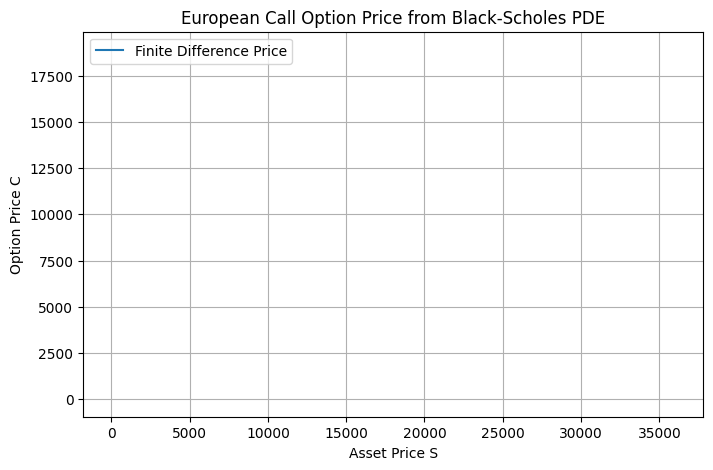

/tmp/ipykernel_12866/920420033.py:64: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))


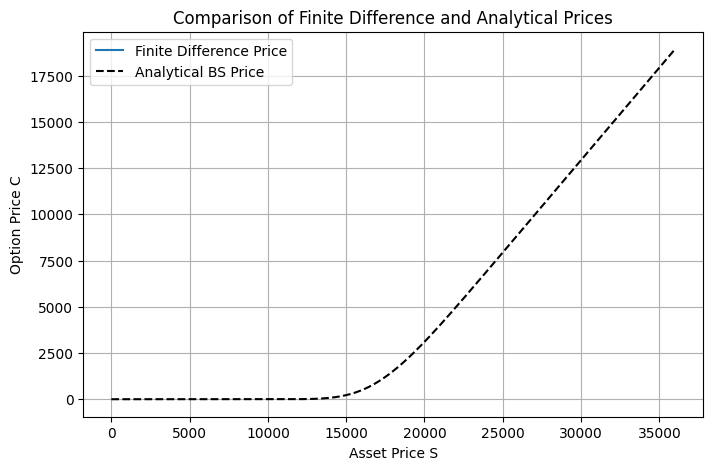

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Option and market parameters
S0 = 18000         # current index level (Nifty50)
K = 17500          # strike price
T = 0.5            # time to maturity in years
r = 0.05           # risk-free rate
sigma = 0.20       # volatility

# Numerical parameters
S_max = 2 * S0     # maximum asset price to consider
dS = 50            # asset price step
dt = 0.0005        # time step
M = int(S_max/dS)  # number of asset price steps
N = int(T/dt)      # number of time steps

# Create grid arrays for asset prices and time steps
S_grid = np.linspace(0, S_max, M+1)
t_grid = np.linspace(0, T, N+1)

# Terminal condition: payoff at expiry for a call option
C = np.maximum(S_grid - K, 0)

# Boundary conditions:
# At S = 0, call value is 0.
# At S = S_max, call value approximates S - K (since deep in the money).
C_new = np.copy(C)

# Finite Difference: Explicit Method (backward in time)
for j in range(N-1, -1, -1):  # stepping backwards in time
    for i in range(1, M):     # loop over asset prices excluding boundaries
        # Coefficients in the PDE
        delta = (C[i+1] - C[i-1]) / (2*dS)
        gamma = (C[i+1] - 2*C[i] + C[i-1]) / (dS**2)
        
        # Explicit finite difference update (backward time stepping)
        C_new[i] = C[i] + dt * (
            r * S_grid[i] * delta +
            0.5 * sigma**2 * S_grid[i]**2 * gamma -
            r * C[i]
        )
    
    # Enforce boundary conditions:
    C_new[0] = 0
    C_new[M] = S_grid[M] - K * np.exp(-r * (T - t_grid[j]))
    
    # Update option values for next time step
    C = np.copy(C_new)

# Plot the option price as a function of underlying asset price at t=0
plt.figure(figsize=(8,5))
plt.plot(S_grid, C, label="Finite Difference Price")
plt.xlabel("Asset Price S")
plt.ylabel("Option Price C")
plt.title("European Call Option Price from Black-Scholes PDE")
plt.legend()
plt.grid(True)
plt.show()

# For comparison, compute the analytical Black-Scholes price at t=0
def bs_call_price(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

bs_prices = bs_call_price(S_grid, K, T, r, sigma)

plt.figure(figsize=(8,5))
plt.plot(S_grid, C, label="Finite Difference Price")
plt.plot(S_grid, bs_prices, 'k--', label="Analytical BS Price")
plt.xlabel("Asset Price S")
plt.ylabel("Option Price C")
plt.title("Comparison of Finite Difference and Analytical Prices")
plt.legend()
plt.grid(True)
plt.show()
